# Matrizes
Uma definição mais formal de matriz seria uma estrutura de dados utilizada para representar variáveis com valores homogêneos, mas embora precisa não precisamos nos apegar tanto a essa definição, uma matriz pode ser entendida como uma tabela que segue algumas regras. Embora não exista nativamente o tipo matriz em python (Assim como na maior parte das linguagens de programação 😒) mas isso não torna sua implementação algo complexo para representa-la apenas devemos criar uma lista de listas.

In [ ]:
matriz = [
    [0, 1, 2],
    [1, 2, 3],
    [2, 3, 4]
]

Claro que parece muito simples e de fato é, embora talvez ainda não esteja claro como podemos usar as matrizes para auxiliar na resolução de problemas acreditem elas são incrivelmente uteis. Agora vamos explorar um pouco das regras as quais a "tabela" deve seguir para ser considerada uma matriz, caso lembre das aulas de matemática você deve saber que uma matriz é dividida em linhas e colunas e que todas as linhas presentes na matriz devem ter exatamente o mesmo numero de colunas.

Como ja deve ter percebido nessa implementação básica não podemos garantir que todas as linhas da matriz vão ser do mesmo tamanho, então que tal criarmos uma função para verificar essa propriedade?

In [ ]:
def is_valid(matriz):
    for i in range(len(matriz)):
        if (len(matriz[i]) != len(matriz[0])):
            return False
    return True

Esse trecho simples de código tem um funcionamento bem simples percorre todas as linhas da matriz e faz uma comparação de sua quantidade de elementos com a primeira linha, e caso detecte uma linha com um numero de elementos diferente das demais o retorno é Falso, caso todas tenham exatamente a mesma quantia de elemento o retorno é Verdadeiro.

Simbora testar alguns objetos que achamos poder ser matrizes?

<img src="https://c.tenor.com/5-yxqQEbeqMAAAAC/jojo-anime.gif" width="300" />



In [ ]:
print(is_valid([
    []
]))

print(is_valid([
    [1, 2, 3]
]))

print(is_valid([
    [1],
    [2],
    [3]
]))

print(is_valid([
    [1, 2, 3],
    [1, 2],
    [1]
]))

True
True
True
False


Como esperado o ultimo não passou no teste e portanto não deveria ser considerado uma matriz, mas todas as outras inclusive a vazia são exemplos validos.

Claro que só saber que é uma matriz não nos ajuda muito então vamos começar a fazer algumas operações com essas belezinhas. E para começar nada melhor que uma simples soma, se ainda se lembra das aulas sabe que para somar duas matrizes é preciso primeiro garantir que elas possuem o mesmo "tamanho", então la vamos nos implementar uma função que confere essa característica.

In [1]:
def mesmo_tamanho(matriz1, matriz2):
    if (is_valid(matriz1) and is_valid(matriz2)):
        if (len(matriz1) == len(matriz2) and len(matriz1[0]) == len(matriz2[0])):
            return True
    return False

Certo, até agora muito bonito podemos conferir se um objeto é uma matriz e se duas matrizes possuem o mesmo "tamanho". Com todos os preparativos prontos agora sim podemos começar a somar certo? <span style="color:red">Errado</span>, vá com calma que ainda temos que implementar a função de somar matrizes, então sem perder mais um segundo vamos cria-la agora mesmo.

In [ ]:
def soma_matriz(matriz1, matriz2):
    if (mesmo_tamanho(matriz1, matriz2)):
        matriz_resultante = []
        for i in range(len(matriz1)):
            linha = []
            for j in range(len(matriz1[0])):
                linha.append(matriz1[i][j]+matriz2[i][j])
            matriz_resultante.append(linha)
        return(matriz_resultante)
    else:
        return ("Erro matizes de tamanho diferente")

Com as funções devidamente implementadas que tal darmos uma espiadinha nelas funcionando?

In [ ]:
matriz1 = [
    [0, 1, 2],
    [1, 2, 3],
    [2, 3, 4]
]
matriz2 = [
    [4, 3, 2],
    [3, 2, 1],
    [2, 1, 0]
]
print(soma_matriz(matriz1, matriz2))

[[4, 4, 4], [4, 4, 4], [4, 4, 4]]


<img src="https://c.tenor.com/qljo2BEYlVMAAAAd/dio-brando-dio.gif" width="300" />

Misericordia que exibição feia, temos que dar um jeitinho para conseguirmos ver melhor essa saída. 

In [ ]:
def exibir_matriz(matriz):
    for i in range(len(matriz)):
        linha = ""
        for j in range(len(matriz[i])):
            linha += "{}\t".format(matriz[i][j])
        print(linha) 

In [ ]:
matriz1 = [
    [0, 1, 2],
    [1, 2, 3],
    [2, 3, 4]
]
matriz2 = [
    [4, 3, 2],
    [3, 2, 1],
    [2, 1, 0]
]
exibir_matriz(soma_matriz(matriz1, matriz2))

4	4	4	
4	4	4	
4	4	4	


É preciso entender que as matrizes não são uteis apenas para fazer operações matemáticas, são extensivamente utilizadas na computação, seja para representar mapas 2D, imagens, agrupar dados diversos, e processar utilizando melhor a GPU.

**Caso de uso:**

Imagens digitais são representadas por matrizes. Cada ponto da imagem (ou pixel) é composto por uma mistura de cores RGB (Red, Green, Blue), que são representados por 8 bits, assim o seu valor  varia de 0 a 255. É comum em algunmas redes sociais, encontarmos filtros para fotos, isso é possível porque as imagens são representadas por uma matriz, sendo assim, possível manipular as cores da imagem.

Um filtro de cor que é bem comum encontrar em softwares de manipulação de imagens é o "preto e branco", que converte os níveis de cores em um nível mais próximo do cinza. Para realizar essa conversão, é necessário percorrer toda a matriz e acessar cada elemento para obter os três níveis de cores RGB. Adiciona-se então 30% do vermelho mais 59% do verde mais 11% do azul. Tais porcentagens estão relacionadas a própria sensibilidade visual do olho humano convencional para as cores primárias.

No código abaixo é possível ver como esse processo de conversão é realizado.

In [ ]:
import numpy as np # importa a blibioteca numpy. Essa blibioteca é necessária para converter nossa imagem em um array.
from PIL import Image # importa a blibioteca PIL, usada para carregar a imagem.

# Carrega a imagem.
image = Image.open('sakura.jpg')
# Função responsável por mudar os níveis de cores da imagem.
def gray_matter(image):
    # "Transforma" a imagem em uma matriz.
    data = np.array(image)
    # Imprime a matriz (opcional).
    print(data)
    # Percorre todas as linhas e colunas da matriz.
    # Obersavação: O número de linhas da matriz que equivale altura da imagem e o número de colunas equivale a largura da imagem.
    for i in range(0, image.height):
      for j in range(0, image.width):
          # Extrai os níveis de cores RGB. Acessando a posição 0 até a posição 2.
          R = data[i][j][0]
          G = data[i][j][1]
          B = data[i][j][2]
          # faz uma média ponderada entre os valores R, G e B.
          tom = int(0.3 * R + 0.59 * G + 0.11 * B)
          # Atribui o novo nível de cores.
          data[i][j][0] = tom
          data[i][j][1] = tom
          data[i][j][2] = tom
    return data

# invoca a função para mudar o tom de cores.
gray_image_matrix = gray_matter(image)
# Salva a matriz modificada como imagem.
gr_im= Image.fromarray(gray_image_matrix).save('gray_sakura.png')


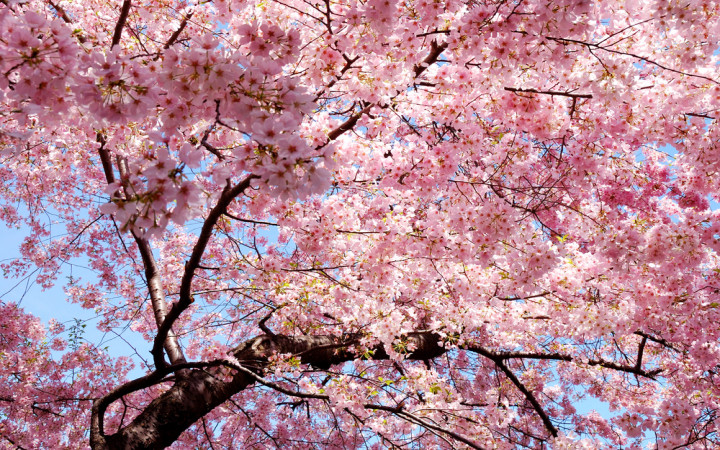

Imagem antes de ser processada pelo código acima.

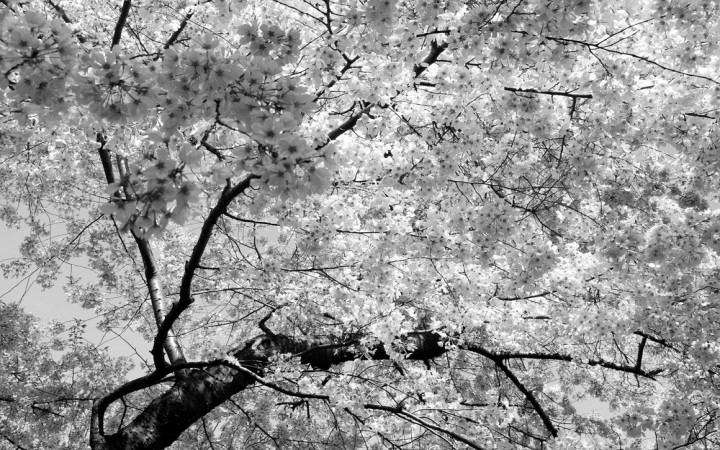

Imagem com o filtro aplicado.